In [1]:
from itertools import product
import numpy as np
from ROOT import TFile, TCanvas, TH1D, TH2D, TLegend, TLatex

Welcome to JupyROOT 6.24/00


In [2]:
def get_hist(object, histkey):
    syst = histkey.split("_")[1]
    f = TFile.Open(f"Outputs/electron/fakerate_{syst}.root")
    h = f.Get(histkey)
    h.SetDirectory(0)
    return h

In [3]:
# prepare canvas and legend and logo
cvs = TCanvas("cvs", "cvs", 800, 700)
legend = TLegend(0.65, 0.65, 0.85, 0.85)
legend.SetFillStyle(0)
legend.SetBorderSize(0)
info = TLatex()
info.SetTextSize(0.035)
info.SetTextFont(42)
logo = TLatex()
logo.SetTextSize(0.04)
logo.SetTextFont(61)
extra_logo = TLatex()
extra_logo.SetTextSize(0.035)
extra_logo.SetTextFont(52)

In [4]:
systs = ["Central", "FlavorDep", "JetPtCutUp", "JetPtCutDown", "JetEnUp", "JetEnDown", "JetResUp", "JetResDown", "ElectronEnUp", "ElectronEnDown", "ElectronResUp", "ElectronResDown", "MuonEnUp", "MuonEnDown"]

systs = ["Central", "FlavorDep"]


paths = ['passEle8Path', 'passEle12Path', 'passEle23Path']
etabins = ['eta0to0p8', 'eta0p8to1p479', 'eta1p479to2p5']
ptCorrBin = [10, 15, 20, 25, 35, 50, 70]

fakerates = dict()
for etabin in etabins:
    h_fakerate = None
    for path in paths:
        histkey = f"{path}_Central_{etabin}"
        h_central = get_hist("electron", histkey)
        h_total = h_central.Clone(f"{path}_total_{etabin}")

        for bin in range(1, h_central.GetNbinsX()+1):
            stat_err = h_central.GetBinError(bin)
            total_err = np.power(stat_err, 2)

            for syst in systs:
                histkey = f"{path}_{syst}_{etabin}"
                h_syst = get_hist("electron", histkey)
                syst_err = h_syst.GetBinContent(bin) - h_central.GetBinContent(bin)
                total_err += np.power(syst_err, 2)
            total_err = np.sqrt(total_err)

            h_total.SetBinError(bin, total_err)
        
        if h_fakerate == None:
            h_fakerate = h_total.Clone(f"fakerate_{etabin}")
        else:
            h_fakerate.Add(h_total)
    
    print(f"==== {etabin} ====")
    for bin in range(1, h_fakerate.GetNbinsX()+1):
        print(f"{bin}: {round(h_fakerate.GetBinError(bin)/h_fakerate.GetBinContent(bin), 2)}")
    
    fakerates[etabin] = h_fakerate

==== eta0to0p8 ====
1: 0.21
2: 0.54
3: 0.22
4: 0.23
5: 0.32
6: 2.06
7: 2.94
8: 0.99
9: 1.91
10: 2.58
11: -6.48
12: 1.45
==== eta0p8to1p479 ====
1: 0.22
2: 0.71
3: 0.25
4: 0.5
5: 0.31
6: 0.75
7: 1.4
8: 2.58
9: 3.42
10: 1.5
11: 1.22
12: 1.05
==== eta1p479to2p5 ====
1: 0.18
2: 0.5
3: 0.72
4: 0.32
5: 0.15
6: 0.19
7: 0.14
8: 1.23
9: 0.3
10: 1.29
11: 1.37
12: 1.09


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cvs


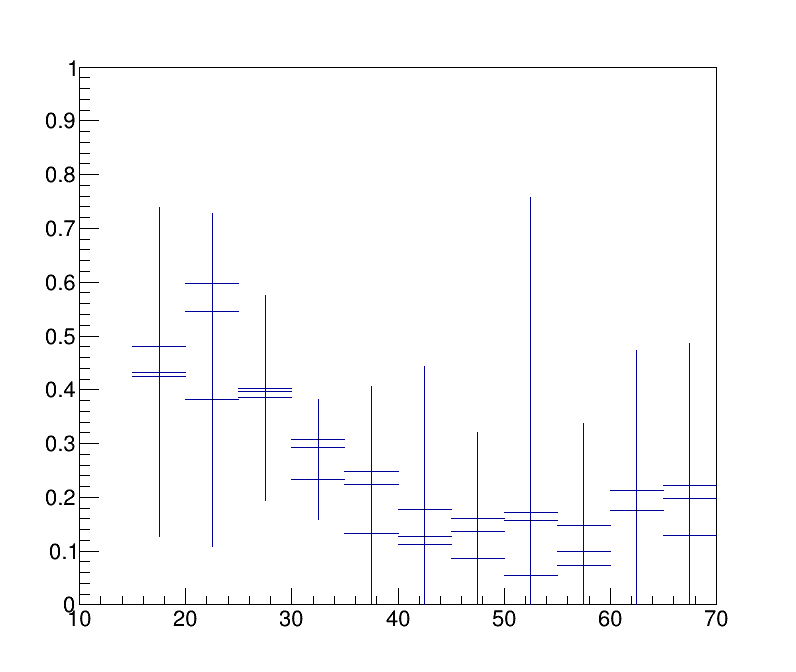

In [5]:
# prepare canvas and legend and logo
cvs = TCanvas("cvs", "cvs", 800, 700)
legend = TLegend(0.65, 0.65, 0.85, 0.85)
legend.SetFillStyle(0)
legend.SetBorderSize(0)
info = TLatex()
info.SetTextSize(0.035)
info.SetTextFont(42)
logo = TLatex()
logo.SetTextSize(0.04)
logo.SetTextFont(61)
extra_logo = TLatex()
extra_logo.SetTextSize(0.035)
extra_logo.SetTextFont(52)

cvs.cd()
for hist in fakerates.values():
    hist.SetStats(0)
    hist.GetYaxis().SetRangeUser(0., 1.)
    hist.Draw("same")
cvs.Draw()